In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('survey_results_public.csv')
df

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


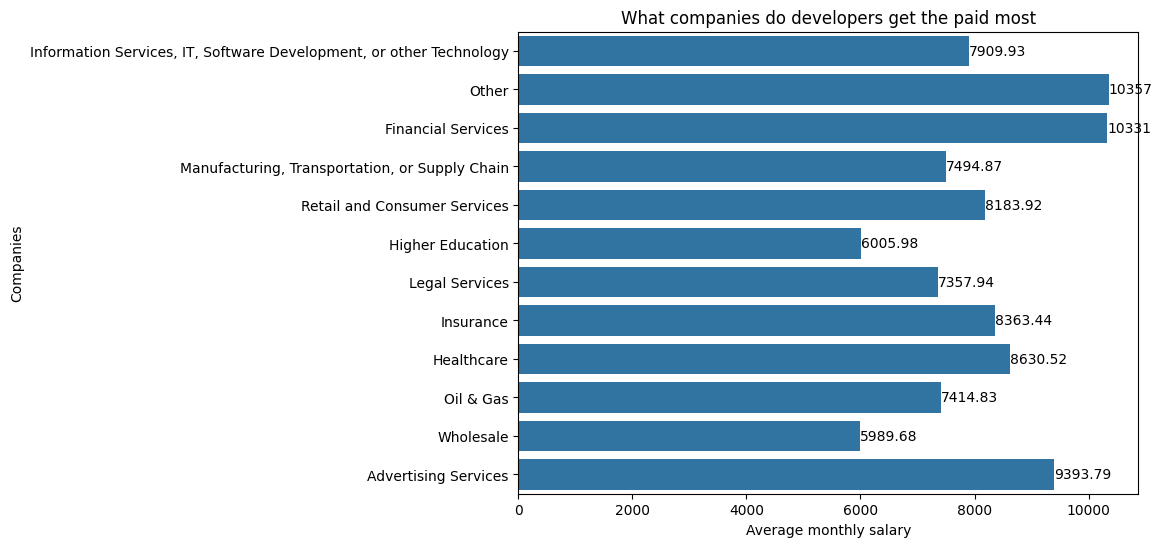

In [4]:
#At what companies do developers get the paid most?

df_without_na = df[['Industry','ConvertedCompYearly']].dropna()
df_without_na['ConvertedCompMonthly'] = df_without_na['ConvertedCompYearly'] / 12
df_without_na['ConvertedCompMonthly'] = df_without_na['ConvertedCompMonthly'].astype('int64')
df_without_na['ConvertedCompYearly'] = df_without_na['ConvertedCompYearly'].astype('int64')

fig,ax = plt.subplots(figsize=(8,6))


sns.barplot(data=df_without_na,x='ConvertedCompMonthly',y='Industry',errorbar=None)
plt.xlabel("Average monthly salary")
plt.ylabel("Companies")

ax.bar_label(ax.containers[0])

plt.title("What companies do developers get the paid most")
plt.show()


In [5]:

df_without_na = df[['Industry','ConvertedCompYearly']].dropna()
df_without_na['ConvertedCompMonthly'] = df_without_na['ConvertedCompYearly'] / 12
df_without_na['ConvertedCompMonthly'] = df_without_na['ConvertedCompMonthly'].astype('int64')
df_without_na['ConvertedCompYearly'] = df_without_na['ConvertedCompYearly'].astype('int64')
grouped = df_without_na.groupby(['Industry'])
avg_salaries = grouped.mean().astype('int64')
avg_salaries.sort_values(by=['ConvertedCompMonthly'], ascending=False)


,ConvertedCompYearly,ConvertedCompMonthly
Industry,,
Other,124288,10357
Financial Services,123977,10331
Advertising Services,112730,9393
Healthcare,103571,8630
Insurance,100366,8363
Retail and Consumer Services,98211,8183
"Information Services, IT, Software Development, or other Technology",94924,7909
"Manufacturing, Transportation, or Supply Chain",89943,7494
Oil & Gas,88982,7414


<Axes: xlabel='Count', ylabel='RemoteWork'>

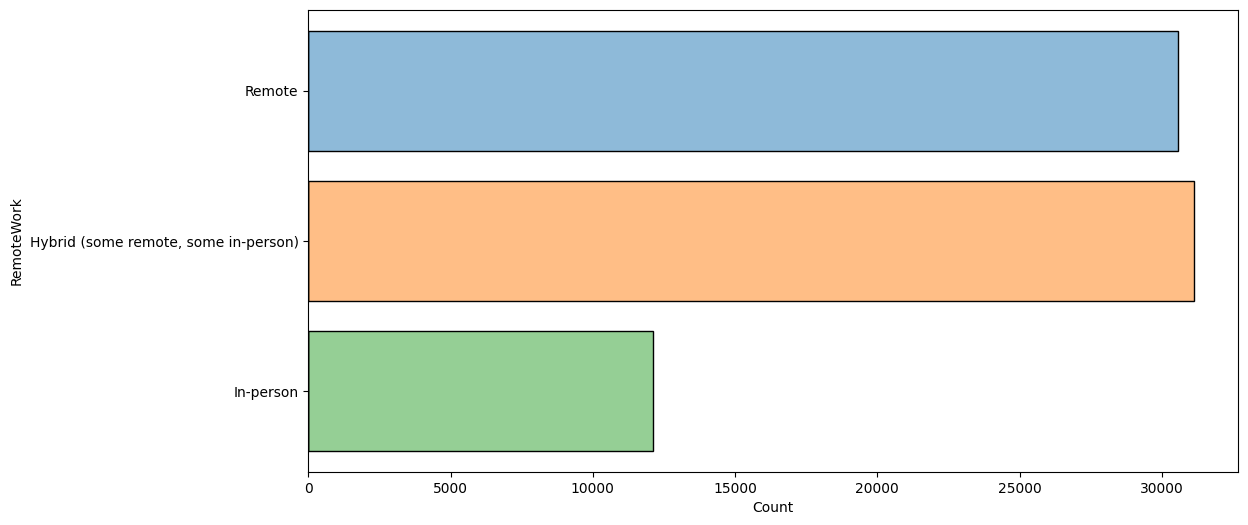

In [6]:

#How much does remote working matter to employees?
df['RemoteWork'] = df['RemoteWork'].dropna()

fig,ax = plt.subplots(figsize=(12,6))
sns.histplot(data=df, y='RemoteWork',shrink=.8,hue='RemoteWork', legend=None,ax=ax)


In [7]:
df_without_na = df['RemoteWork'].dropna().reset_index()
grouped = df_without_na.groupby('RemoteWork').size().reset_index()
grouped.sort_values(by=[0],ascending = False)

,RemoteWork,0
0,"Hybrid (some remote, some in-person)",31131
2,Remote,30566
1,In-person,12113


C:\Users\mateo\AppData\Local\Temp\ipykernel_14688\2046921653.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=query, x='YearsCodePro',y='ConvertedCompMonthly',errorbar=None,dodge=False,palette='turbo',ax=ax)


<Axes: xlabel='YearsCodePro', ylabel='ConvertedCompMonthly'>

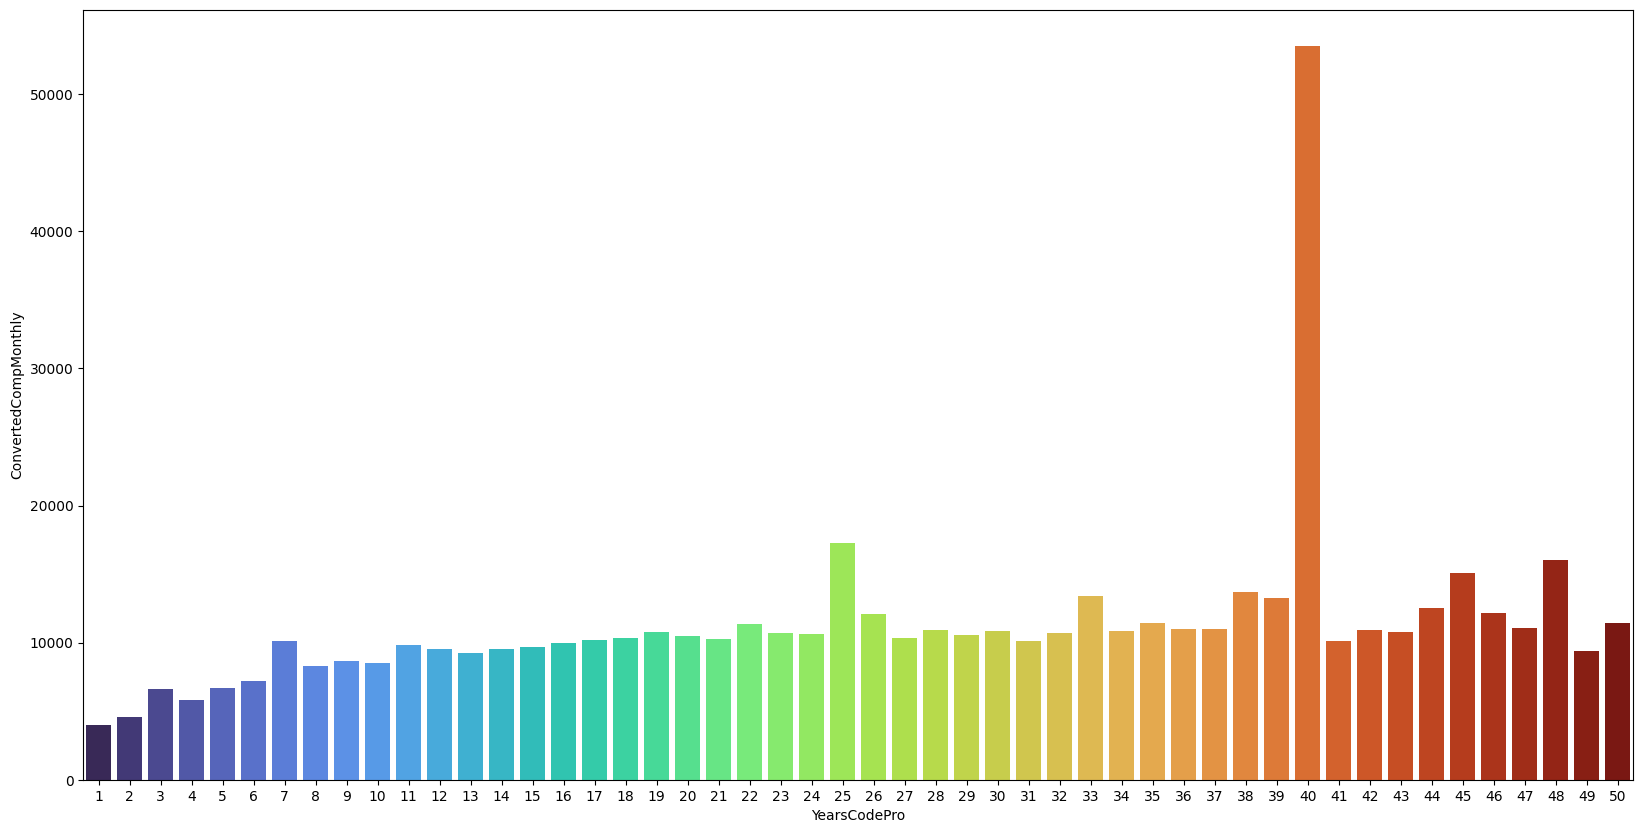

In [8]:
#How does coding experiences affect the level of pay?
df_without_na = df[['ConvertedCompYearly','YearsCodePro']].dropna()
df_without_na['YearsCodePro'] = df_without_na['YearsCodePro'].str.strip()
df_without_na['ConvertedCompYearly'] = df_without_na['ConvertedCompYearly'].astype(np.int64)
df_without_na['ConvertedCompMonthly'] = df_without_na['ConvertedCompYearly']/12
df_without_na['ConvertedCompMonthly'] = df_without_na['ConvertedCompMonthly'].astype(np.int64)


query = df_without_na[df_without_na['YearsCodePro']!='Less than 1 year']
query = query[query['YearsCodePro']!='More than 50 years']

query['YearsCodePro'] = query['YearsCodePro'].astype(np.int64)
query = query.sort_values(['YearsCodePro']).reset_index(drop=True)

query=query.drop(columns='ConvertedCompYearly')

query.dtypes
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(data=query, x='YearsCodePro',y='ConvertedCompMonthly',errorbar=None,dodge=False,palette='turbo',ax=ax)


In [17]:
#Whats the most popular method of learning to code?
metodos_aprendizaje = df['LearnCode'].str.split(';').explode().value_counts()
metodos_aprendizaje


LearnCode
Other online resources (e.g., videos, blogs, forum)    70244
Books / Physical media                                 45406
School (i.e., University, College, etc)                43957
Online Courses or Certification                        43201
On the job training                                    40380
Colleague                                              20523
Friend or family member                                 9936
Coding Bootcamp                                         8602
Hackathons (virtual or in-person)                       7033
Other (please specify):                                 5451
Name: count, dtype: int64

In [26]:
#Are you more likely to get a job as developer if you have a masters degree?
df[['EdLevel']]

grouped = df.groupby(['MainBranch','EdLevel']).size().reset_index().pivot(columns='MainBranch',index='EdLevel',values=0)
grouped = grouped.sort_values(['I am a developer by profession'], ascending=False)
grouped

#Answer: Not actually, because we see with just having a Bachelor’s degree you can get a job easily

MainBranch,I am a developer by profession,I am learning to code,"I am not primarily a developer, but I write code sometimes as part of my work/studies",I code primarily as a hobby,"I used to be a developer by profession, but no longer am"
EdLevel,,,,,
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",31498,1205,2824,476,703
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17223,303,2151,263,603
Some college/university study without earning a degree,8437,1082,1340,647,247
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",3949,1577,1101,2192,78
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2590,58,998,123,118
"Associate degree (A.A., A.S., etc.)",2201,175,262,102,67
Something else,861,187,122,272,33
Primary/elementary school,478,374,156,885,12
